In [62]:
import json
from collections import Counter
import igraph as ig

In [63]:
with open('../data/hashtags/stitch/vertices/sources/makeup.json') as f:
    sources = json.load(f)

with open('../data/hashtags/stitch/vertices/targets/makeup.json') as f:
    targets = json.load(f)

with open('../data/hashtags/stitch/edges/makeup_edges.txt') as f:
    edges = f.readlines()

In [64]:
stitcher, stitchee = zip(*[edge.strip().split(',') for edge in edges])
stitcher = [s.split('/')[-1] for s in stitcher]
stitchee = [s.split('/')[-1] for s in stitchee]

# convert stitchers and stitchees to integers if not 'None'
stitcher = [int(s) if s != 'None' else None for s in stitcher]
stitchee = [int(s) if s != 'None' else None for s in stitchee]

In [65]:
data = {}

for video in sources + targets:
    data[video['id']] = video

    if video['id'] in stitcher:
        data[video['id']]['is_stitcher'] = True
        for i in range(len(stitcher)):
            if stitcher[i] == video['id']:
                data[video['id']]['stitches'] = stitchee[i]
    else:
        data[video['id']]['is_stitcher'] = False
    
    if video['id'] in stitchee:
        data[video['id']]['is_stitchee'] = True
        for i in range(len(stitchee)):
            if stitchee[i] == video['id']:
                if 'stitchers' in data[video['id']]:
                    data[video['id']]['stitchers'].append(stitcher[i])
                else:
                    data[video['id']]['stitchers'] = [stitcher[i]]
    else:
        data[video['id']]['is_stitchee'] = False

In [66]:
list(data.values())[2]

{'hashtag_names': ['makeup', 'stitch', 'trending', 'viral', 'fyp'],
 'id': 7375270046907518250,
 'is_stem_verified': False,
 'region_code': 'US',
 'username': 'zaiinott',
 'video_description': '#stitch with @Baked Potato 🥔 #fyp #viral #trending #makeup thats just my take on it',
 'view_count': 355,
 'create_time': 1717188877,
 'is_stitcher': True,
 'stitches': 7374899881980284202,
 'is_stitchee': False}

In [67]:
g = ig.Graph.TupleList([(j,k) for j, k in zip(stitcher, stitchee) if k is not None], directed=True)

In [68]:
g.vs['has_data'] = [v['name'] in data for v in g.vs]

In [69]:
sum([s in data for s in stitchee]) / len(stitchee)

0.6008708272859217

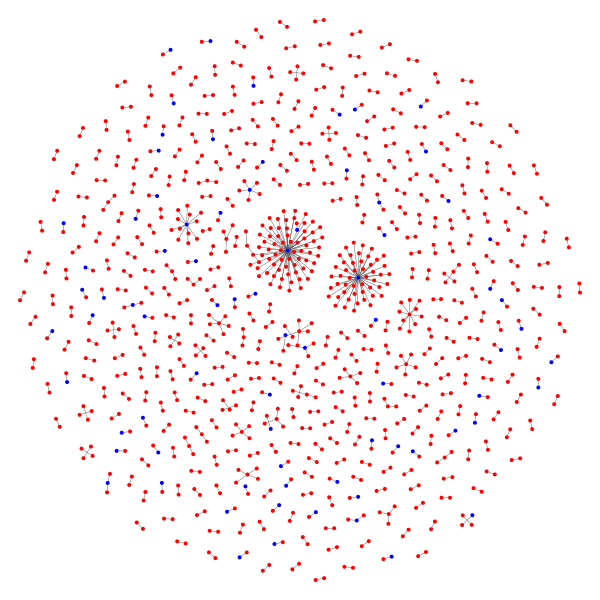

In [70]:
ig.plot(g, layout=g.layout_graphopt(), vertex_size=4, vertex_label=None, vertex_frame_width=0, 
            edge_arrow_size=0, edge_width=0.4, vertex_color=['red' if v['has_data'] else 'blue' for v in g.vs])